In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv",)

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [5]:
from sklearn.cluster import KMeans # En yakın komşular
from sklearn.metrics import silhouette_score

In [6]:
df=df.drop(['Activity Period','Operating Airline IATA Code','Published Airline IATA Code'],axis=1)

In [7]:
df.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [8]:
df.isnull().sum()

Operating Airline      0
Published Airline      0
GEO Summary            0
GEO Region             0
Activity Type Code     0
Price Category Code    0
Terminal               0
Boarding Area          0
Passenger Count        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Operating Airline    18885 non-null  object
 1   Published Airline    18885 non-null  object
 2   GEO Summary          18885 non-null  object
 3   GEO Region           18885 non-null  object
 4   Activity Type Code   18885 non-null  object
 5   Price Category Code  18885 non-null  object
 6   Terminal             18885 non-null  object
 7   Boarding Area        18885 non-null  object
 8   Passenger Count      18885 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [10]:
x=pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [12]:
df.columns

Index(['Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [13]:
model=KMeans(n_clusters=4)

In [14]:
model=model.fit(x)

In [15]:
tahmin=model.predict(x)

In [16]:
tahmin

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
df["cluster"]=tahmin

In [18]:
df.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,cluster
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,1
1,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,1
2,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,1
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,3
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,1


In [19]:
df.shape

(18885, 10)

In [20]:
silhouette_score(x,tahmin)

0.7861526188949846

In [21]:
import matplotlib.pyplot as plt

In [22]:
allscore=[]
allclusters=[]
kırılma=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        kırılma.append(uzaklik)
clust(10)

Cluster  2  score  0.8596461896015775
Cluster  3  score  0.8285981224256898
Cluster  4  score  0.7861526188949846
Cluster  5  score  0.7846347832599421
Cluster  6  score  0.6609963552071288
Cluster  7  score  0.6618353114831399
Cluster  8  score  0.6460589106494679
Cluster  9  score  0.639911084026448
Cluster  10  score  0.6141813194340653
Cluster  11  score  0.6109606825615973


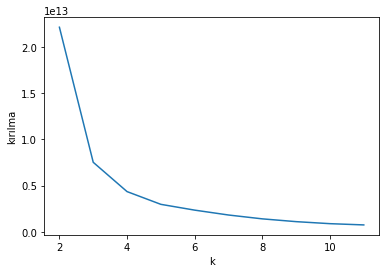

In [23]:
plt.xlabel("k")
plt.ylabel("kırılma")
plt.plot(allclusters,kırılma)

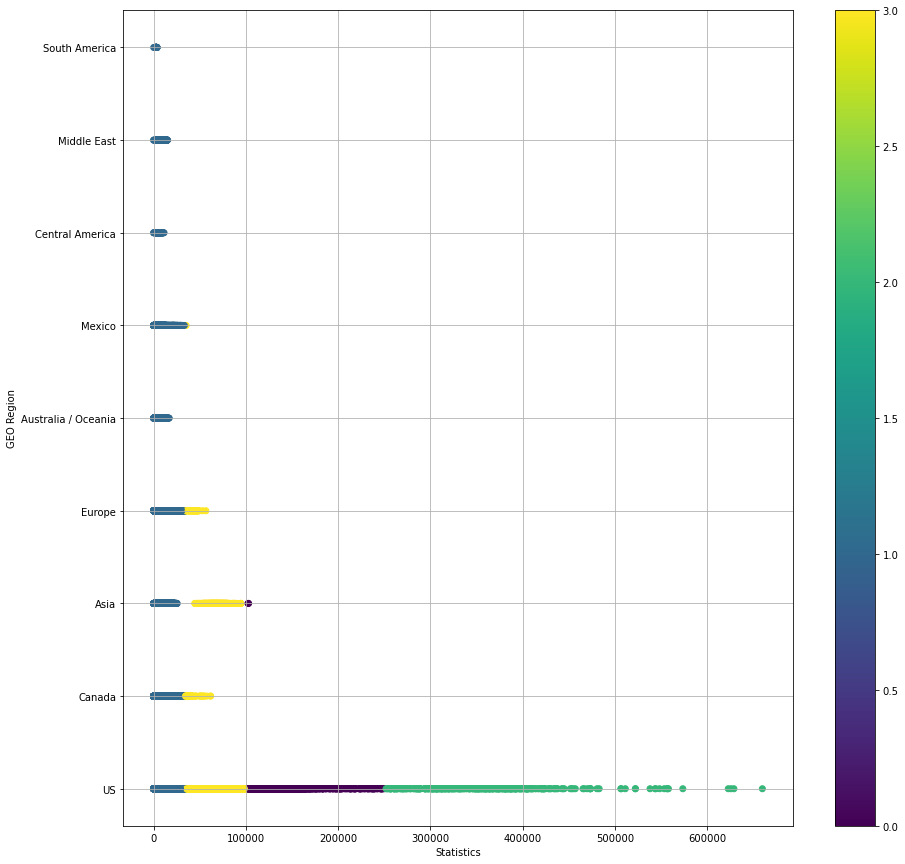

In [24]:
plt.figure(figsize=(15,15))
plt.scatter(df["Passenger Count"],y=df["GEO Region"],c=tahmin)
plt.xlabel("Statistics")
plt.ylabel("GEO Region")
plt.colorbar()
plt.grid()